In [1]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data, get_Teams_in_Match, load_pit_data
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
scouted_data = load_scouted_data()
scouted_data
scouted_data["Total Fuel in Hub"] = scouted_data["Auto Fuel"] + scouted_data["Teleop Fuel"]

In [4]:
pit_data = load_pit_data()
pit_data

,Scouter Initials,Team Number,Intake,Climbing Level (Auto),Climbing Level (Endgame),Auto Start,Piece Auto,Climb type,Over Bumper?,Under Trench?,Carrying Capacity,Preload Number,Defense Skill (0-5)
0,abc,3504,Ground,1,1,right,16,in,True,False,8,8,2
1,abc,8393,Depot,0,2,right,6,in,False,True,12,6,1
2,abc,67,Ground,1,3,middle,3,out,True,True,6,3,4
3,abc,1678,Human Player Station,0,1,left,8,out,False,True,10,4,3
4,abc,118,Ground,1,1,left,0,in,True,True,10,0,5
5,abc,254,Human Player Station,1,0,middle,8,out,False,True,8,8,1
6,abc,2056,Depot,1,0,left,9,out,True,False,12,8,2


In [5]:
teams = get_Teams_in_Match()
match_data = scouted_data.loc[scouted_data["Team Number"].isin(teams)]
print(match_data)

TypeError: get_Teams_in_Match() missing 1 required positional argument: 'match_number'

In [ ]:
avg_6_teams=match_data.groupby("Team Number").mean(numeric_only=True)
avg_6_teams

In [6]:
fig = px.bar(avg_6_teams, y="Auto Fuel", title="Fuel in Hub (Auto) per Robot")
fig.show()

NameError: name 'avg_6_teams' is not defined

In [7]:
fig = px.bar(avg_6_teams, y="Teleop Fuel", title="Fuel in Hub (Teleop) per Robot")
fig.show()

NameError: name 'avg_6_teams' is not defined

In [8]:
avg_overall=scouted_data.groupby("Team Number").mean(numeric_only=True)
avg_overall

,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Fuel Passed,Total Fuel in Hub
Team Number,,,,,,,
10101,1.000000,8.250000,1.000000,11.000000,57.000000,99.750000,65.250000
10137,0.333333,7.333333,0.666667,7.000000,80.000000,65.333333,87.333333
1014,0.500000,7.250000,0.750000,1.750000,82.000000,168.500000,89.250000
10269,0.333333,10.333333,0.666667,7.666667,110.333333,124.333333,120.666667
10479,0.750000,11.250000,0.750000,10.750000,123.000000,133.750000,134.250000
1466,0.666667,6.000000,0.333333,2.666667,99.333333,119.000000,105.333333
1592,0.250000,7.250000,0.250000,8.250000,123.250000,70.000000,130.500000
1708,0.666667,6.333333,0.333333,10.333333,65.666667,128.666667,72.000000
21,0.500000,11.750000,0.500000,5.500000,56.000000,50.750000,67.750000


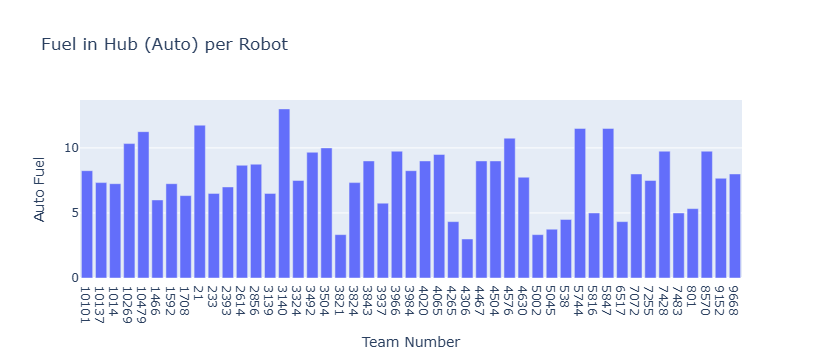

In [9]:
fig = px.bar(avg_overall, y="Auto Fuel", title="Fuel in Hub (Auto) per Robot")
fig.show()

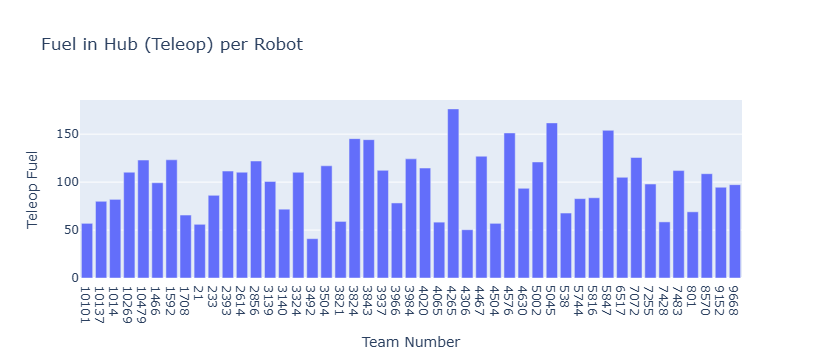

In [10]:
fig = px.bar(avg_overall, y="Teleop Fuel", title="Fuel in Hub (Teleop) per Robot")
fig.show()

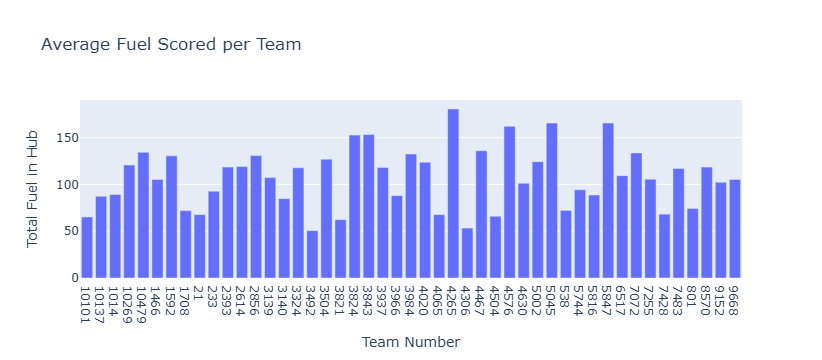

In [11]:
fig = px.bar(avg_overall, y="Total Fuel in Hub", title="Average Fuel Scored per Team")
fig.show()